<a href="https://colab.research.google.com/github/blackbudge98-cpu/gt-markets/blob/main/Google_Keywords_as_a_predictive_indicator_of_USD_trading_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Google Keywords as a predictive indicator of USD trading performance**

The Project is exploring how Google Trend KeyWord Data can be used in forward validation to determine the probability of a movement in a trading pair.

Our Control Variable will be USD to determine's its performance on the following trading pairs:

*   USD to Chinese Yuan
*   USD to BTC
*   USD to Oil
*   USD to Gold





In [39]:
#Use of the following libaries will assist in providing the project manager with the data

import yfinance as yf
import pandas as pd
from datetime import date

#The first data set we will want to see is USD over a 10 year period

tickers = ["USD", "USDCNY=X","BTC-USD","CL=F", "GC=F"]

#The definition of tickers will assist in a batch query rather than a singular batch query

df = yf.download(tickers, period="10y", interval="1d")["Close"]

# Flatten the MultiIndex columns
df.columns = [f"{ticker}" for ticker in df.columns]

# Rename the columns to be more user friendly, and align with our assumptions
# This will result in a MultiIndex DataFrame - REMOVING THIS COMMENT as it's no longer a MultiIndex
df.rename(columns={"CL=F":"USD to Oil","GC=F":"USD to Gold","BTC-USD": "USD to BTC","USDCNY=X": "USD to Chinese Yuan"},inplace=True)


#print headers for 10 rows to see what the data looks like

print(df.head(10))

/tmp/ipython-input-3953875302.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers, period="10y", interval="1d")["Close"]
[*********************100%***********************]  5 of 5 completed

            USD to BTC  USD to Oil  USD to Gold       USD  USD to Chinese Yuan
Date                                                                          
2015-09-04  230.298004   46.049999  1120.599976       NaN               6.3459
2015-09-05  235.018997         NaN          NaN       NaN                  NaN
2015-09-06  239.839996         NaN          NaN       NaN                  NaN
2015-09-07  239.847000         NaN          NaN       NaN               6.3459
2015-09-08  243.606995   45.939999  1120.400024  1.448019               6.3559
2015-09-09  238.167999   44.150002  1102.199951  1.419348               6.3572
2015-09-10  238.477005   45.919998  1109.500000  1.444812               6.3678
2015-09-11  240.106995   44.630001  1103.500000  1.426165               6.3672
2015-09-12  235.229004         NaN          NaN       NaN                  NaN
2015-09-13  230.511993         NaN          NaN       NaN                  NaN


In [40]:
from google.colab import drive
from google.colab import auth
from googleapiclient.discovery import build
from googleapiclient.http import MediaFileUpload
import os
from datetime import date

# Authenticate and mount Google Drive
drive.mount('/content/drive', force_remount=True)
auth.authenticate_user()
drive_service = build('drive', 'v3')

# Define the folder ID and filename
folder_id = '1wOqTixtRA5n5uHN1ptfIbQm6suTrLDxA'
today = date.today()
filename = f"financial_data_raw_data_from_yf{today.strftime('%Y-%m-%d')}.csv"
filepath = f"/content/{filename}" # Save locally first

# Save the DataFrame to a temporary local CSV file
df.to_csv(filepath)

# Create a file in the shared drive
file_metadata = {
    'name': filename,
    'parents': [folder_id]
}

media = MediaFileUpload(filepath, mimetype='text/csv')

gfile = drive_service.files().create(
    body=file_metadata,
    media_body=media,
    fields='id'
).execute()

print(f"File ID: {gfile.get('id')}")
print(f"Data exported to shared drive folder: {folder_id}")

# Clean up the local file
os.remove(filepath)

Mounted at /content/drive
File ID: 1MAmMyAO_CtBJXcfBL6AbJGNmD_ptddk_
Data exported to shared drive folder: 1wOqTixtRA5n5uHN1ptfIbQm6suTrLDxA


In [41]:
#Next step is to obtain information on the datatable, and apply pre-processing steps

df.info()

#understand how many numbers of rows are in the dataset
print('\n')
num_rows = len(df)
print(f"Number of rows: {num_rows}")

#the next step is to export the dataset as a csv file to enable a view of the data
from google.colab import drive
from google.colab import auth
from googleapiclient.discovery import build
from googleapiclient.http import MediaFileUpload
import os
from datetime import date

# Authenticate and mount Google Drive (if not already mounted)
try:
    drive.mount('/content/drive', force_remount=True)
    auth.authenticate_user()
    drive_service = build('drive', 'v3')
except Exception as e:
    print(f"Google Drive authentication or mount failed: {e}")
    # Exit or handle the error appropriately if mount fails
    pass


# Define the folder ID and filename
folder_id = '1wOqTixtRA5n5uHN1ptfIbQm6suTrLDxA' # Use the folder ID that worked previously
today = date.today()
filename = f"financial_data_raw_data_from_yf_api_{today.strftime('%Y-%m-%d')}.csv" # Changed filename slightly to distinguish
filepath = f"/content/{filename}" # Save locally first


# Save the DataFrame to a temporary local CSV file
df.to_csv(filepath)

# Create a file in the shared drive using the Google Drive API
file_metadata = {
    'name': filename,
    'parents': [folder_id]
}

media = MediaFileUpload(filepath, mimetype='text/csv')

try:
    gfile = drive_service.files().create(
        body=file_metadata,
        media_body=media,
        fields='id'
    ).execute()

    print(f"File ID: {gfile.get('id')}")
    print(f"Data exported to shared drive folder: {folder_id}")

except Exception as e:
    print(f"Error exporting data to shared drive: {e}")

# Clean up the local file
os.remove(filepath)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3654 entries, 2015-09-04 to 2025-09-04
Freq: D
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   USD to BTC           3654 non-null   float64
 1   USD to Oil           2514 non-null   float64
 2   USD to Gold          2513 non-null   float64
 3   USD                  2513 non-null   float64
 4   USD to Chinese Yuan  2603 non-null   float64
dtypes: float64(5)
memory usage: 171.3 KB


Number of rows: 3654
Mounted at /content/drive
File ID: 1Qho1gcmBxJT9BXNq5Angck1CW8qgpuwn
Data exported to shared drive folder: 1wOqTixtRA5n5uHN1ptfIbQm6suTrLDxA


In [42]:
print("Blank values in the raw database")
print('\n')

#Identify the number of rows are blank
print(df.isna().sum())

print('\n')
blank_rate = (df.isna().sum() / num_rows) * 100
print("Blank Rate (%):")
print(blank_rate.round(2))

Blank values in the raw database


USD to BTC                0
USD to Oil             1140
USD to Gold            1141
USD                    1141
USD to Chinese Yuan    1051
dtype: int64


Blank Rate (%):
USD to BTC              0.00
USD to Oil             31.20
USD to Gold            31.23
USD                    31.23
USD to Chinese Yuan    28.76
dtype: float64


In [43]:
#After Identifying the blank rate in the original dataframe pre-processing needs to be applied
df_for_pre_processing = df.copy()
df_for_pre_processing['Day of Week'] = df_for_pre_processing.index.day_name()
print (df_for_pre_processing.head(10))

#We know Bitcoin trades all the time, but we want to see if there is any other blanks in the dataset
print('\n')
print("Blank values in the pre-processed database")
print('\n')
missing_values_per_day_of_week = df_for_pre_processing.groupby('Day of Week').apply(lambda g: g.isna().sum().sum())
print(missing_values_per_day_of_week)

            USD to BTC  USD to Oil  USD to Gold       USD  \
Date                                                        
2015-09-04  230.298004   46.049999  1120.599976       NaN   
2015-09-05  235.018997         NaN          NaN       NaN   
2015-09-06  239.839996         NaN          NaN       NaN   
2015-09-07  239.847000         NaN          NaN       NaN   
2015-09-08  243.606995   45.939999  1120.400024  1.448019   
2015-09-09  238.167999   44.150002  1102.199951  1.419348   
2015-09-10  238.477005   45.919998  1109.500000  1.444812   
2015-09-11  240.106995   44.630001  1103.500000  1.426165   
2015-09-12  235.229004         NaN          NaN       NaN   
2015-09-13  230.511993         NaN          NaN       NaN   

            USD to Chinese Yuan Day of Week  
Date                                         
2015-09-04               6.3459      Friday  
2015-09-05                  NaN    Saturday  
2015-09-06                  NaN      Sunday  
2015-09-07               6.3459      

/tmp/ipython-input-2653046579.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_values_per_day_of_week = df_for_pre_processing.groupby('Day of Week').apply(lambda g: g.isna().sum().sum())


In [45]:
#Therefore in the pre-processing dataset the decision will be made to drop both Saturday and Sunday
df_weekday = df_for_pre_processing.drop(df_for_pre_processing[(df_for_pre_processing['Day of Week'] == 'Saturday') | (df_for_pre_processing['Day of Week'] == 'Sunday')].index)

# Correctly select columns using the flattened column names
df_weekday_reordered = df_weekday[['Day of Week', 'USD', 'USD to Chinese Yuan', 'USD to BTC', 'USD to Oil', 'USD to Gold']]

df_weekday_reordered.head(10)

,Day of Week,USD,USD to Chinese Yuan,USD to BTC,USD to Oil,USD to Gold
Date,,,,,,
2015-09-04,Friday,NaN,6.3459,230.298004,46.049999,1120.599976
2015-09-07,Monday,NaN,6.3459,239.847000,NaN,NaN
2015-09-08,Tuesday,1.448019,6.3559,243.606995,45.939999,1120.400024
2015-09-09,Wednesday,1.419348,6.3572,238.167999,44.150002,1102.199951
2015-09-10,Thursday,1.444812,6.3678,238.477005,45.919998,1109.500000
2015-09-11,Friday,1.426165,6.3672,240.106995,44.630001,1103.500000
2015-09-14,Monday,1.427568,6.3650,230.643997,44.000000,1107.699951
2015-09-15,Tuesday,1.467869,6.3579,230.304001,44.590000,1102.800049
2015-09-16,Wednesday,1.461052,6.3600,229.091003,47.150002,1119.199951


In [46]:
#Where data is missing the assumption will be to replace in the df_weekday dataframe with the previous value in the dataset
df_weekday_usd = df_weekday.drop(columns=['USD to BTC','USD to Oil','USD to Gold','USD to Chinese Yuan'])
df_weekday_usd_reordered = df_weekday_usd[['Day of Week', 'USD']]
df_weekday_usd_reordered.head(10)

,Day of Week,USD
Date,,
2015-09-04,Friday,NaN
2015-09-07,Monday,NaN
2015-09-08,Tuesday,1.448019
2015-09-09,Wednesday,1.419348
2015-09-10,Thursday,1.444812
2015-09-11,Friday,1.426165
2015-09-14,Monday,1.427568
2015-09-15,Tuesday,1.467869
2015-09-16,Wednesday,1.461052


In [47]:
#Next step is for any NaN is to show the dates
df_weekday_usd_reordered.isna().sum()



,0
Day of Week,0
USD,97


In [48]:
# Show dates where 'USD' is NaN
dates_with_missing_usd = df_weekday_usd_reordered[df_weekday_usd_reordered['USD'].isna()].index
print("Dates with missing 'USD' values:")
print(dates_with_missing_usd)

Dates with missing 'USD' values:
DatetimeIndex(['2015-09-04', '2015-09-07', '2015-11-26', '2015-12-25',
               '2016-01-01', '2016-01-18', '2016-02-15', '2016-03-25',
               '2016-05-30', '2016-07-04', '2016-09-05', '2016-11-24',
               '2016-12-26', '2017-01-02', '2017-01-16', '2017-02-20',
               '2017-04-14', '2017-05-29', '2017-07-04', '2017-09-04',
               '2017-11-23', '2017-12-25', '2018-01-01', '2018-01-15',
               '2018-02-19', '2018-03-30', '2018-05-28', '2018-07-04',
               '2018-09-03', '2018-11-22', '2018-12-05', '2018-12-25',
               '2019-01-01', '2019-01-21', '2019-02-18', '2019-04-19',
               '2019-05-27', '2019-07-04', '2019-09-02', '2019-11-28',
               '2019-12-25', '2020-01-01', '2020-01-20', '2020-02-17',
               '2020-04-10', '2020-05-25', '2020-07-03', '2020-09-07',
               '2020-11-26', '2020-12-25', '2021-01-01', '2021-01-18',
               '2021-02-15', '2021-04-02', '

There are holidays in the United States which are not a set date but rather a day near of. For simplicity of the dataset it will be easier to use the previous close value.

In [49]:
# Where there is a NaaN going to use the previous day close to populate the value
df_weekday_usd_reordered['USD'] = df_weekday_usd_reordered['USD'].ffill()
df_weekday_usd_reordered.head(10)

,Day of Week,USD
Date,,
2015-09-04,Friday,NaN
2015-09-07,Monday,NaN
2015-09-08,Tuesday,1.448019
2015-09-09,Wednesday,1.419348
2015-09-10,Thursday,1.444812
2015-09-11,Friday,1.426165
2015-09-14,Monday,1.427568
2015-09-15,Tuesday,1.467869
2015-09-16,Wednesday,1.461052


In [50]:
#Now we add a daily change amount, and a percentage daily change to the dataset
df_weekday_usd_reordered['Daily Change'] = df_weekday_usd_reordered['USD'].diff()
df_weekday_usd_reordered['% Daily Change'] = df_weekday_usd_reordered['Daily Change'] / df_weekday_usd_reordered['USD']

# Fill the initial NaN values with 0
df_weekday_usd_reordered['Daily Change'].fillna(0, inplace=True)
df_weekday_usd_reordered['% Daily Change'].fillna(0, inplace=True)

df_weekday_usd_reordered.head(10)

/tmp/ipython-input-1527400944.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_weekday_usd_reordered['Daily Change'].fillna(0, inplace=True)
/tmp/ipython-input-1527400944.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

,Day of Week,USD,Daily Change,% Daily Change
Date,,,,
2015-09-04,Friday,NaN,0.000000,0.000000
2015-09-07,Monday,NaN,0.000000,0.000000
2015-09-08,Tuesday,1.448019,0.000000,0.000000
2015-09-09,Wednesday,1.419348,-0.028671,-0.020200
2015-09-10,Thursday,1.444812,0.025463,0.017624
2015-09-11,Friday,1.426165,-0.018647,-0.013075
2015-09-14,Monday,1.427568,0.001403,0.000983
2015-09-15,Tuesday,1.467869,0.040301,0.027455
2015-09-16,Wednesday,1.461052,-0.006817,-0.004666


In [51]:
#Export the DF Weekday USD Performance as a CSV File with the First Date - Last Date as the file name
from google.colab import drive
from google.colab import auth
from googleapiclient.discovery import build
from googleapiclient.http import MediaFileUpload
import os
from datetime import date

# Authenticate and mount Google Drive (if not already mounted)
drive.mount('/content/drive')
auth.authenticate_user()
drive_service = build('drive', 'v3')

# Define the folder ID and filename
folder_id = '1wOqTixtRA5n5uHN1ptfIbQm6suTrLDxA'
today = date.today()
filename = f"financial_data_pre_processed_data_from_yf_{today.strftime('%Y-%m-%d')}.csv" # Changed filename slightly to distinguish
filepath = f"/content/{filename}" # Save locally first

# Save the DataFrame to a temporary local CSV file
df_weekday_usd_reordered.to_csv(filepath)

# Create a file in the shared drive
file_metadata = {
    'name': filename,
    'parents': [folder_id]
}

media = MediaFileUpload(filepath, mimetype='text/csv')

gfile = drive_service.files().create(
    body=file_metadata,
    media_body=media,
    fields='id'
).execute()

print(f"File ID: {gfile.get('id')}")
print(f"Data exported to shared drive folder: {folder_id}")

# Clean up the local file
os.remove(filepath)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
File ID: 15HicIzECyfDVybpmGu8on0pB3yXjeqgw
Data exported to shared drive folder: 1wOqTixtRA5n5uHN1ptfIbQm6suTrLDxA


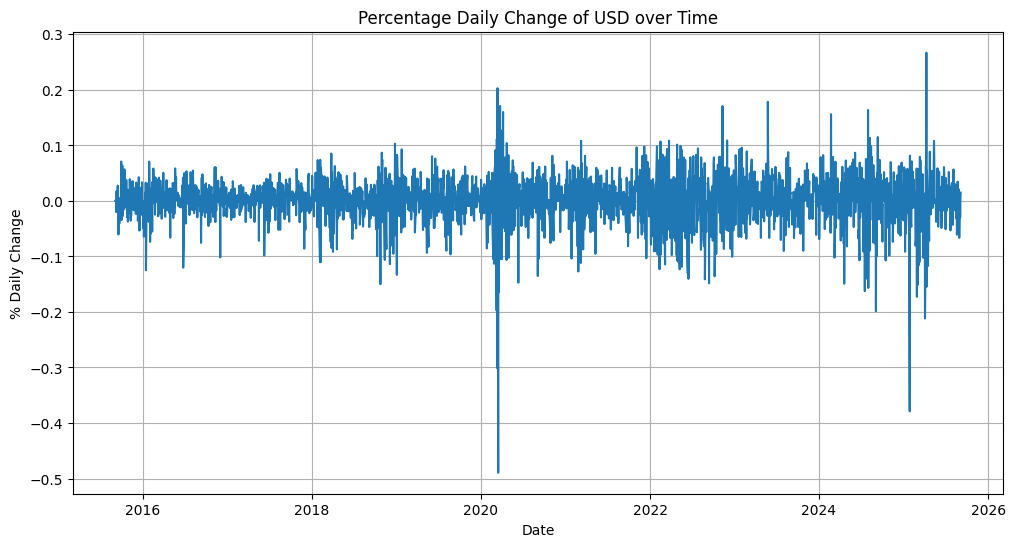

In [52]:
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(df_weekday_usd_reordered.index, df_weekday_usd_reordered['% Daily Change'])
plt.title('Percentage Daily Change of USD over Time')
plt.xlabel('Date')
plt.ylabel('% Daily Change')
plt.grid(True)
plt.show()

In [53]:
# Calculate the first and third quartiles for 'Daily Change'
Q1 = df_weekday_usd_reordered['Daily Change'].quantile(0.25)
Q3 = df_weekday_usd_reordered['Daily Change'].quantile(0.75)

# Filter the DataFrame for dates where 'Daily Change' is below Q1 or above Q3
outliers_dates = df_weekday_usd_reordered[(df_weekday_usd_reordered['Daily Change'] < Q1) | (df_weekday_usd_reordered['Daily Change'] > Q3)]

# Print a table of these dates and their corresponding 'Daily Change' values
print("Dates with Daily Change outside of Q1 and Q3:")
display(outliers_dates[['Daily Change']])

Dates with Daily Change outside of Q1 and Q3:


,Daily Change
Date,
2016-01-15,-0.158177
2016-06-24,-0.199275
2016-09-09,-0.162036
2016-12-01,-0.242149
2017-05-17,-0.236764
...,...
2025-08-26,1.900002
2025-08-28,0.260002
2025-08-29,-5.610001


In [54]:
# Print Max and Min Percentage changes and the dates they occured
max_percentage_change = df_weekday_usd_reordered['% Daily Change'].max()
min_percentage_change = df_weekday_usd_reordered['% Daily Change'].min()

date_max_change = df_weekday_usd_reordered['% Daily Change'].idxmax()
date_min_change = df_weekday_usd_reordered['% Daily Change'].idxmin()


print(f"Maximum Percentage Daily Change: {max_percentage_change:.4f}% on {date_max_change.strftime('%Y-%m-%d')}")
print(f"Minimum Percentage Daily Change: {min_percentage_change:.4f}% on {date_min_change.strftime('%Y-%m-%d')}")

Maximum Percentage Daily Change: 0.2670% on 2025-04-09
Minimum Percentage Daily Change: -0.4896% on 2020-03-16


In [57]:
# === Multi-keyword Google Trends Pipeline ===
# What this does:
# - Loops over a list of keywords (like "USD", "gold price", "bitcoin")
# - For each keyword:
#     * If we already have a CSV saved for that keyword, load it (skip download)
#     * If not, download daily Google Trends data in 6-month chunks
#     * Clean it to daily frequency (fill missing values)
#     * Save it to /processed folder
# - Combine all keyword trend files into one dataframe
# - Merge that dataframe into the financial dataset (anchor table)
# - Save everything back into /processed
#
# End result:
#   - One CSV per keyword (trends_<keyword>.csv)
#   - A combined all-keywords trends CSV (trends_all_keywords_daily.csv)
#   - A merged financial+trends CSV (merged_with_trends_multi.csv)

!pip -q install pytrends
import os, time, datetime as dt, re
import pandas as pd
from pytrends.request import TrendReq
from dateutil.relativedelta import relativedelta
from google.colab import drive
from google.colab import auth
from googleapiclient.discovery import build
from googleapiclient.http import MediaFileUpload

# -----------------------------
# Project folders (we keep everything under /gt-markets/data/processed)
# -----------------------------
PROJECT_DIR = "/content/drive/MyDrive/gt-markets"
DATA_DIR    = f"{PROJECT_DIR}/data"
PROC_DIR    = f"{DATA_DIR}/processed"
os.makedirs(PROC_DIR, exist_ok=True)  # make sure /processed exists

# -----------------------------
# Anchor dataframe (financial data table we merge trends into)
# We prefer "prices" (daily multi-asset data). If not defined, fall back to df_weekday_usd_reordered.
# -----------------------------
try:
    anchor = prices.copy()
    print("[info] Using 'prices' as the anchor table")
except NameError:
    anchor = df_weekday_usd_reordered.copy()
    print("[info] Using 'df_weekday_usd_reordered' as the anchor table")

# Make sure the index (row labels) is datetime so we can align by date
anchor.index = pd.to_datetime(anchor.index)

# Date range for trends = same as the anchor dataframe
start_date = pd.to_datetime(anchor.index.min()).date()
end_date   = pd.to_datetime(anchor.index.max()).date()
print(f"[info] Trends date range: {start_date} → {end_date}")

# -----------------------------
# Keywords we want to track in Google Trends
# Add/remove keywords in this list as needed
# -----------------------------
KEYWORDS = [
    "USD",
    "gold price",
    "bitcoin",
    "oil price",
    "Chinese yuan",
]

# -----------------------------
# Helper: convert a keyword into a safe slug (for filenames and column names)
# Example: "Gold Price" -> "gold_price"
# -----------------------------
def slugify(text: str) -> str:
    text = text.strip().lower()
    text = re.sub(r"[^a-z0-9]+", "_", text)  # replace spaces/symbols with "_"
    return text.strip("_")

# -----------------------------
# Helper: yield 6-month chunks between start_date and end_date
# Google Trends only lets you pull limited time spans at once
# -----------------------------
def daterange_chunks(s: dt.date, e: dt.date, months=6):
    cur = s
    while cur <= e:
        nxt = min(cur + relativedelta(months=months) - relativedelta(days=1), e)
        yield cur, nxt
        cur = nxt + relativedelta(days=1)

# -----------------------------
# Helper: fetch daily Google Trends for one keyword
# Steps:
#   - Loop over chunks (6 months each)
#   - Request data from Google
#   - Collect into a dataframe
#   - Align to daily frequency (forward fill missing days)
# -----------------------------
def fetch_trends_daily(keyword: str, start_date: dt.date, end_date: dt.date, months_per_chunk: int = 6) -> pd.DataFrame:
    pt = TrendReq(hl="en-US", tz=0)  # session for Google Trends
    frames = []
    for i, (s, e) in enumerate(daterange_chunks(start_date, end_date, months_per_chunk), 1):
        timeframe = f"{s} {e}"
        tries, delay = 0, 8
        while True:
            try:
                pt.build_payload([keyword], timeframe=timeframe, geo='', gprop='')
                part = pt.interest_over_time().drop(columns=["isPartial"], errors="ignore")
                if len(part):
                    part = part.rename(columns={keyword: keyword})
                    frames.append(part)
                print(f"[ok] {keyword} chunk {i}: {s} → {e}, rows={len(part)}")
                time.sleep(1.0)  # polite pause so Google doesn't block us
                break
            except Exception as ex:
                tries += 1
                if tries > 5:  # give up after 5 retries
                    print(f"[warn] {keyword} failed for {timeframe}: {ex}")
                    break
                print(f"[429/backoff] {keyword} {timeframe} → sleep {delay}s … (try {tries}/5)")
                time.sleep(delay)
                delay = min(int(delay * 1.8), 180)  # exponential backoff

    if not frames:
        return pd.DataFrame()  # nothing returned

    # Combine all chunks into one dataframe
    out = pd.concat(frames).sort_index()
    out.index = pd.to_datetime(out.index)
    # Force daily frequency (if Google gave weekly, fill in the missing days)
    out = out.asfreq("D").ffill()
    return out

# -----------------------------
# Main loop over keywords
# For each keyword:
#   - If CSV already exists, load it
#   - Else fetch from Google and save
#   - Ensure column has a unique name (<keyword>_trend)
#   - Add to all_trends list for later combination
# -----------------------------
all_trends = []

for kw in KEYWORDS:
    print(f"\n=== Keyword: {kw} ===")
    slug = slugify(kw)
    col_name = f"{slug}_trend"
    per_kw_csv = f"{PROC_DIR}/trends_{slug}_daily.csv"

    if os.path.exists(per_kw_csv):
        # If file already exists, load it instead of downloading
        print(f"[skip] Found existing file → {per_kw_csv}")
        tdf = pd.read_csv(per_kw_csv, index_col=0, parse_dates=True)
        # Ensure daily grid (if old file had weekly rows)
        tdf = tdf.asfreq("D").ffill()
    else:
        # Download from Google Trends
        tdf = fetch_trends_daily(kw, start_date, end_date)
        if tdf.empty:
            print(f"[warn] No data for '{kw}'. Skipping.")
            continue
        # Rename column to e.g. "usd_trend" or "gold_price_trend"
        tdf = tdf.rename(columns={kw: col_name})
        # Save to CSV
        tdf.to_csv(per_kw_csv)
        print(f"[ok] saved {kw}: {tdf.shape} → {per_kw_csv}")

    # Safety check: make sure column name is correct
    if col_name not in tdf.columns:
        tdf = tdf.rename(columns={tdf.columns[0]: col_name})

    # Keep only the single trend column
    all_trends.append(tdf[[col_name]])

# -----------------------------
# Combine all keyword trend dataframes into one
# -----------------------------
if all_trends:
    trends_all = pd.concat(all_trends, axis=1).sort_index()
    trends_all_csv = f"{PROC_DIR}/trends_all_keywords_daily.csv"
    trends_all.to_csv(trends_all_csv)
    print(f"[ok] saved combined trends: {trends_all.shape} → {trends_all_csv}")

    # Merge trends into anchor financial dataset (keep all rows from anchor)
    merged = anchor.join(trends_all, how="left")
else:
    print("[warn] No trends tables created; merged will just equal anchor table")
    merged = anchor.copy()

# -----------------------------
# Save the merged financial+trends dataset to Google Drive
# -----------------------------
# Authenticate and mount Google Drive (if not already mounted)
try:
    drive.mount('/content/drive', force_remount=True)
    auth.authenticate_user()
    drive_service = build('drive', 'v3')
except Exception as e:
    print(f"Google Drive authentication or mount failed: {e}")
    # Exit or handle the error appropriately if mount fails
    pass

# Define the folder ID and filename
folder_id = '1wOqTixtRA5n5uHN1ptfIbQm6suTrLDxA'  # User specified folder ID
today = date.today()
filename = f"merged_financial_trends_data_{today.strftime('%Y-%m-%d')}.csv"
filepath = f"/content/{filename}" # Save locally first

# Save the merged DataFrame to a temporary local CSV file
merged.to_csv(filepath)

# Create a file in the shared drive using the Google Drive API
file_metadata = {
    'name': filename,
    'parents': [folder_id]
}

media = MediaFileUpload(filepath, mimetype='text/csv')

try:
    gfile = drive_service.files().create(
        body=file_metadata,
        media_body=media,
        fields='id'
    ).execute()

    print(f"Merged Data File ID: {gfile.get('id')}")
    print(f"Merged Data exported to shared drive folder: {folder_id}")

except Exception as e:
    print(f"Error exporting merged data to shared drive: {e}")

# Clean up the local file
os.remove(filepath)


# -----------------------------
# Tips for adding keywords later:
# - Just add the new keyword text to the KEYWORDS list above
# - Run the cell again
# - The code will automatically fetch and save only the new ones
# - Existing CSVs will be reused (skipped)
# -----------------------------

[info] Using 'df_weekday_usd_reordered' as the anchor table
[info] Trends date range: 2015-09-04 → 2025-09-04

=== Keyword: USD ===
[skip] Found existing file → /content/drive/MyDrive/gt-markets/data/processed/trends_usd_daily.csv

=== Keyword: gold price ===
[skip] Found existing file → /content/drive/MyDrive/gt-markets/data/processed/trends_gold_price_daily.csv

=== Keyword: bitcoin ===
[429/backoff] bitcoin 2015-09-04 2016-03-03 → sleep 8s … (try 1/5)
[429/backoff] bitcoin 2015-09-04 2016-03-03 → sleep 14s … (try 2/5)
[429/backoff] bitcoin 2015-09-04 2016-03-03 → sleep 25s … (try 3/5)
[429/backoff] bitcoin 2015-09-04 2016-03-03 → sleep 45s … (try 4/5)
[ok] bitcoin chunk 1: 2015-09-04 → 2016-03-03, rows=182
[ok] bitcoin chunk 2: 2016-03-04 → 2016-09-03, rows=184
[ok] bitcoin chunk 3: 2016-09-04 → 2017-03-03, rows=181
[ok] bitcoin chunk 4: 2017-03-04 → 2017-09-03, rows=184
[ok] bitcoin chunk 5: 2017-09-04 → 2018-03-03, rows=181
[ok] bitcoin chunk 6: 2018-03-04 → 2018-09-03, rows=184
[

In [58]:
# -----------------------------
# Project folders (we keep everything under /gt-markets/data/processed)
# -----------------------------
PROJECT_DIR = "/content/drive/MyDrive/gt-markets"
DATA_DIR    = f"{PROJECT_DIR}/data"
PROC_DIR    = f"{DATA_DIR}/processed"
os.makedirs(PROC_DIR, exist_ok=True)  # make sure /processed exists

# -----------------------------
# Anchor dataframe (financial data table we merge trends into)
# We prefer "prices" (daily multi-asset data). If not defined, fall back to df_weekday_usd_reordered.
# -----------------------------
try:
    anchor = prices.copy()
    print("[info] Using 'prices' as the anchor table")
except NameError:
    anchor = df_weekday_usd_reordered.copy()
    print("[info] Using 'df_weekday_usd_reordered' as the anchor table")

# Make sure the index (row labels) is datetime so we can align by date
anchor.index = pd.to_datetime(anchor.index)

# Date range for trends = same as the anchor dataframe
start_date = pd.to_datetime(anchor.index.min()).date()
end_date   = pd.to_datetime(anchor.index.max()).date()
print(f"[info] Trends date range: {start_date} → {end_date}")

# -----------------------------
# Keywords we want to track in Google Trends
# Add/remove keywords in this list as needed
# -----------------------------
KEYWORDS = [
    "Inflation",
    "Ruin",
    "Intervention",
    "Gamble",
    "Luxury",
]

# -----------------------------
# Helper: convert a keyword into a safe slug (for filenames and column names)
# Example: "Gold Price" -> "gold_price"
# -----------------------------
def slugify(text: str) -> str:
    text = text.strip().lower()
    text = re.sub(r"[^a-z0-9]+", "_", text)  # replace spaces/symbols with "_"
    return text.strip("_")

# -----------------------------
# Helper: yield 6-month chunks between start_date and end_date
# Google Trends only lets you pull limited time spans at once
# -----------------------------
def daterange_chunks(s: dt.date, e: dt.date, months=6):
    cur = s
    while cur <= e:
        nxt = min(cur + relativedelta(months=months) - relativedelta(days=1), e)
        yield cur, nxt
        cur = nxt + relativedelta(days=1)

# -----------------------------
# Helper: fetch daily Google Trends for one keyword
# Steps:
#   - Loop over chunks (6 months each)
#   - Request data from Google
#   - Collect into a dataframe
#   - Align to daily frequency (forward fill missing days)
# -----------------------------
def fetch_trends_daily(keyword: str, start_date: dt.date, end_date: dt.date, months_per_chunk: int = 6) -> pd.DataFrame:
    pt = TrendReq(hl="en-US", tz=0)  # session for Google Trends
    frames = []
    for i, (s, e) in enumerate(daterange_chunks(start_date, end_date, months_per_chunk), 1):
        timeframe = f"{s} {e}"
        tries, delay = 0, 8
        while True:
            try:
                pt.build_payload([keyword], timeframe=timeframe, geo='', gprop='')
                part = pt.interest_over_time().drop(columns=["isPartial"], errors="ignore")
                if len(part):
                    part = part.rename(columns={keyword: keyword})
                    frames.append(part)
                print(f"[ok] {keyword} chunk {i}: {s} → {e}, rows={len(part)}")
                time.sleep(1.0)  # polite pause so Google doesn't block us
                break
            except Exception as ex:
                tries += 1
                if tries > 5:  # give up after 5 retries
                    print(f"[warn] {keyword} failed for {timeframe}: {ex}")
                    break
                print(f"[429/backoff] {keyword} {timeframe} → sleep {delay}s … (try {tries}/5)")
                time.sleep(delay)
                delay = min(int(delay * 1.8), 180)  # exponential backoff

    if not frames:
        return pd.DataFrame()  # nothing returned

    # Combine all chunks into one dataframe
    out = pd.concat(frames).sort_index()
    out.index = pd.to_datetime(out.index)
    # Force daily frequency (if Google gave weekly, fill in the missing days)
    out = out.asfreq("D").ffill()
    return out

# -----------------------------
# Main loop over keywords
# For each keyword:
#   - If CSV already exists, load it
#   - Else fetch from Google and save
#   - Ensure column has a unique name (<keyword>_trend)
#   - Add to all_trends list for later combination
# -----------------------------
all_trends = []

for kw in KEYWORDS:
    print(f"\n=== Keyword: {kw} ===")
    slug = slugify(kw)
    col_name = f"{slug}_trend"
    per_kw_csv = f"{PROC_DIR}/trends_{slug}_daily.csv"

    if os.path.exists(per_kw_csv):
        # If file already exists, load it instead of downloading
        print(f"[skip] Found existing file → {per_kw_csv}")
        tdf = pd.read_csv(per_kw_csv, index_col=0, parse_dates=True)
        # Ensure daily grid (if old file had weekly rows)
        tdf = tdf.asfreq("D").ffill()
    else:
        # Download from Google Trends
        tdf = fetch_trends_daily(kw, start_date, end_date)
        if tdf.empty:
            print(f"[warn] No data for '{kw}'. Skipping.")
            continue
        # Rename column to e.g. "usd_trend" or "gold_price_trend"
        tdf = tdf.rename(columns={kw: col_name})
        # Save to CSV
        tdf.to_csv(per_kw_csv)
        print(f"[ok] saved {kw}: {tdf.shape} → {per_kw_csv}")

    # Safety check: make sure column name is correct
    if col_name not in tdf.columns:
        tdf = tdf.rename(columns={tdf.columns[0]: col_name})

    # Keep only the single trend column
    all_trends.append(tdf[[col_name]])

# -----------------------------
# Combine all keyword trend dataframes into one
# -----------------------------
if all_trends:
    trends_all = pd.concat(all_trends, axis=1).sort_index()
    trends_all_csv = f"{PROC_DIR}/trends_all_keywords_daily.csv"
    trends_all.to_csv(trends_all_csv)
    print(f"[ok] saved combined trends: {trends_all.shape} → {trends_all_csv}")

    # Merge trends into anchor financial dataset (keep all rows from anchor)
    merged = anchor.join(trends_all, how="left")
else:
    print("[warn] No trends tables created; merged will just equal anchor table")
    merged = anchor.copy()

# -----------------------------
# Save the merged financial+trends dataset to Google Drive
# -----------------------------
# Authenticate and mount Google Drive (if not already mounted)
try:
    drive.mount('/content/drive', force_remount=True)
    auth.authenticate_user()
    drive_service = build('drive', 'v3')
except Exception as e:
    print(f"Google Drive authentication or mount failed: {e}")
    # Exit or handle the error appropriately if mount fails
    pass

# Define the folder ID and filename
folder_id = '1wOqTixtRA5n5uHN1ptfIbQm6suTrLDxA'  # User specified folder ID
today = date.today()
filename = f"merged_financial_trends_data_{today.strftime('%Y-%m-%d')}.csv"
filepath = f"/content/{filename}" # Save locally first

# Save the merged DataFrame to a temporary local CSV file
merged.to_csv(filepath)

# Create a file in the shared drive using the Google Drive API
file_metadata = {
    'name': filename,
    'parents': [folder_id]
}

media = MediaFileUpload(filepath, mimetype='text/csv')

try:
    gfile = drive_service.files().create(
        body=file_metadata,
        media_body=media,
        fields='id'
    ).execute()

    print(f"Merged Data File ID: {gfile.get('id')}")
    print(f"Merged Data exported to shared drive folder: {folder_id}")

except Exception as e:
    print(f"Error exporting merged data to shared drive: {e}")

# Clean up the local file
os.remove(filepath)


# -----------------------------
# Tips for adding keywords later:
# - Just add the new keyword text to the KEYWORDS list above
# - Run the cell again
# - The code will automatically fetch and save only the new ones
# - Existing CSVs will be reused (skipped)
# -----------------------------

[info] Using 'df_weekday_usd_reordered' as the anchor table
[info] Trends date range: 2015-09-04 → 2025-09-04

=== Keyword: Inflation ===
[429/backoff] Inflation 2015-09-04 2016-03-03 → sleep 8s … (try 1/5)
[429/backoff] Inflation 2015-09-04 2016-03-03 → sleep 14s … (try 2/5)
[429/backoff] Inflation 2015-09-04 2016-03-03 → sleep 25s … (try 3/5)
[429/backoff] Inflation 2015-09-04 2016-03-03 → sleep 45s … (try 4/5)
[ok] Inflation chunk 1: 2015-09-04 → 2016-03-03, rows=182
[ok] Inflation chunk 2: 2016-03-04 → 2016-09-03, rows=184
[ok] Inflation chunk 3: 2016-09-04 → 2017-03-03, rows=181
[ok] Inflation chunk 4: 2017-03-04 → 2017-09-03, rows=184
[ok] Inflation chunk 5: 2017-09-04 → 2018-03-03, rows=181
[ok] Inflation chunk 6: 2018-03-04 → 2018-09-03, rows=184
[ok] Inflation chunk 7: 2018-09-04 → 2019-03-03, rows=181
[ok] Inflation chunk 8: 2019-03-04 → 2019-09-03, rows=184
[ok] Inflation chunk 9: 2019-09-04 → 2020-03-03, rows=182
[ok] Inflation chunk 10: 2020-03-04 → 2020-09-03, rows=184
[o

In [ ]:
# Merge the financial and Google Trends DataFrames on the date index
merged_df = pd.merge(df_weekday_usd_reordered, pytrends_usd_dataframe, left_index=True, right_index=True, how='inner')

# Display the merged DataFrame
print("Merged DataFrame:")
display(merged_df.head())

In [ ]:
from google.colab import drive
from google.colab import auth
from googleapiclient.discovery import build
from googleapiclient.http import MediaFileUpload
import os
from datetime import date

# Authenticate and mount Google Drive
drive.mount('/content/drive', force_remount=True)
auth.authenticate_user()
drive_service = build('drive', 'v3')

# Define the folder ID for raw data and filename
raw_data_folder_id = '1wOqTixtRA5n5uHN1ptfIbQm6suTrLDxA' # Folder that worked previously for raw data
today = date.today()
raw_filename = f"financial_data_raw_data_from_yf_api_{today.strftime('%Y-%m-%d')}.csv"
raw_filepath = f"/content/{raw_filename}" # Save locally first

# Save the raw DataFrame to a temporary local CSV file
df.to_csv(raw_filepath)

# Create a file in the raw data shared drive folder using the Google Drive API
raw_file_metadata = {
    'name': raw_filename,
    'parents': [raw_data_folder_id]
}

raw_media = MediaFileUpload(raw_filepath, mimetype='text/csv')

raw_gfile = drive_service.files().create(
    body=raw_file_metadata,
    media_body=raw_media,
    fields='id'
).execute()

print(f"Raw Data File ID: {raw_gfile.get('id')}")
print(f"Raw Data exported to shared drive folder: {raw_data_folder_id}")

# Clean up the local raw file
os.remove(raw_filepath)

In [ ]:
from google.colab import drive
from google.colab import auth
from googleapiclient.discovery import build
from googleapiclient.http import MediaFileUpload
import os
from datetime import date

# Authenticate and mount Google Drive (if not already mounted)
# Ensure drive is mounted before proceeding
try:
    drive.mount('/content/drive', force_remount=True)
    auth.authenticate_user()
    drive_service = build('drive', 'v3')
except Exception as e:
    print(f"Google Drive authentication or mount failed: {e}")
    # Exit or handle the error appropriately if mount fails
    # For this example, we'll continue but the upload will fail if mount failed
    pass


# Define the folder ID for preprocessed data and filename
preprocessed_data_folder_id = '1tqNeIkQM2IawFLS-NHBzaDl8fsJAo0t_' # Folder for preprocessed data
today = date.today()
preprocessed_filename = f"financial_data_pre_processed_data_from_yf_api_{today.strftime('%Y-%m-%d')}.csv"
preprocessed_filepath = f"/content/{preprocessed_filename}" # Save locally first

# Save the preprocessed DataFrame to a temporary local CSV file
df_weekday_usd_reordered.to_csv(preprocessed_filepath)

# Create a file in the preprocessed data shared drive folder using the Google Drive API
preprocessed_file_metadata = {
    'name': preprocessed_filename,
    'parents': [preprocessed_data_folder_id]
}

preprocessed_media = MediaFileUpload(preprocessed_filepath, mimetype='text/csv')

try:
    preprocessed_gfile = drive_service.files().create(
        body=preprocessed_file_metadata,
        media_body=preprocessed_media,
        fields='id'
    ).execute()

    print(f"Preprocessed Data File ID: {preprocessed_gfile.get('id')}")
    print(f"Preprocessed Data exported to shared drive folder: {preprocessed_data_folder_id}")

except Exception as e:
    print(f"Error exporting preprocessed data to shared drive: {e}")


# Clean up the local preprocessed file
os.remove(preprocessed_filepath)